In [1]:
# version de testeo final
# Esta versión se deriva a funciones en el código


import funcionesCalculo as ft
import numpy as np
import matplotlib.pyplot as plt

# importacion de datos del terreno
espesor,cotas,az,nivel_freatico,pe_seco,pe_saturado,E,poisson,cohesion,fi,cc,e0,tipo_datos=ft.datos_terreno()


# funciones auxiliares para el cálculo de la presion total

def insertar_valor(lista, valor):
    # funcion para insertar la cota en la lista de cotas y ordenarla
    lista_mod=[] # se evita alterar la lista original
    lista_mod=lista.copy()
    lista_mod.append(valor)  # Agrega el valor a la lista
    lista_mod.sort()         # Ordena la lista en orden ascendente
    return lista_mod


def obtener_maximo_menor(lista, valor):
    # calculamos el valor de la cota inferior del estrato superior 
    # más cercano a la cota que se introduce
    maximo_menor = max(filter(lambda x: x <= valor, lista))
    return maximo_menor


def presion_total(cotas,valor_nf,pe_saturado,pe_seco,valor_cota):
    
    # cotas es la lista de cotas
    # pe_saturado, lista de pesos específicos saturados
    # pe_seco.lista de pesos específicos secos
    # nf es la profundidad del nivel freático
    # z es la profundidad a la que se va a calcular la presión total
    
    
    lista_cotas = cotas.copy() # se copia la lista de las cotas para no alterarla

    #lista ordenada contiene la lista de las cotas y la cota hasta la que se quiere calcular las tensiones
    if valor_nf not in lista_cotas: 
        lista_valores = insertar_valor(lista_cotas, valor_nf)
    else:
        lista_valores=lista_cotas
    
    # resultado es el valor de la cota inmediatamente anterior a la que queremos calcular
    resultado = obtener_maximo_menor(lista_valores, valor_cota)
    
    
    # calculo del estrato del fondo
    peso_saturado=pe_saturado[ft.parametro_terreno(cotas,valor_cota)] # peso especifico saturado
    peso_seco=pe_seco[ft.parametro_terreno(cotas, valor_cota)] # peso especifico seco
    
    # cálculo de las presiones totales y efectivas, inicio de valores
    peso=peso_seco if valor_cota<=valor_nf else peso_saturado
    presion_total=(valor_cota-resultado)*peso
    
    # resto de estratos
    for j in range(lista_valores.index(resultado),0,-1):
        espesor=lista_valores[j]-lista_valores[j-1] # espesor del estrato
        peso_saturado=pe_saturado[ft.parametro_terreno(cotas,lista_valores[j])] # peso especifico saturado
        peso_seco=pe_seco[ft.parametro_terreno(cotas,lista_valores[j])] # peso especifico seco
        posicion=lista_valores[j] # indica la cota del final del nivel
    
        # sumatoria de las presiones
        if (posicion<=valor_nf):
            peso=peso_seco
        else:
            peso=peso_saturado
    
        presion_total=presion_total+espesor*peso
    
    return presion_total

nivelfr=3
z=48

# calculo de un valor determinado para testeo
valor_presion=presion_total(cotas,nivelfr,pe_saturado,pe_seco,z)
print("El valor de la presion total es {0:.2f} kN/m2".format(valor_presion))
# valores de las presiones de poro y efectivas
valor_presion_poro=ft.n_freatico(nivelfr,z)*9.81
print("El valor de la presion de poro es {0:.2f} kN/m2".format(valor_presion_poro))
valor_presion_efectiva=valor_presion-valor_presion_poro
print("El valor de la presion efectiva es {0:.2f} kN/m2".format(valor_presion_efectiva))

    


El valor de la presion total es 1002.00 kN/m2
El valor de la presion de poro es 441.45 kN/m2
El valor de la presion efectiva es 560.55 kN/m2


In [2]:
def ploteado_tensiones_normales(cotas,nivel_freatico,pe_saturado,pe_seco):
    # función de ploteado de la ley de tensiones normales del terreno

    lista_valores = insertar_valor(cotas, nivel_freatico)
    # vectores a plotear 
    cota=[]
    presion=[]
    
    
    # generación de los vectores
    for z in lista_valores:
        valor_presion=presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,z)
        cota.append(z)
        presion.append(valor_presion)

    # representación grafica de la ley de tensiones
    plt.plot(presion,cota)
    plt.gca().invert_yaxis()
    plt.title('Presiones Totales en el terreno')
    plt.xlabel('Presion [kN/m2]')
    plt.ylabel('Profundidad [m]')
    plt.show()   


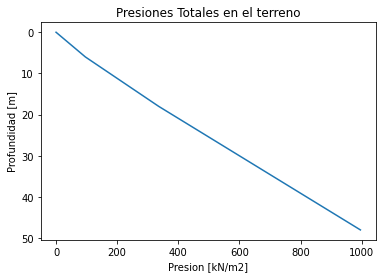

In [3]:
ploteado_tensiones_normales(cotas,nivel_freatico,pe_saturado,pe_seco)

In [17]:

lista_valores

[0, 6, 6, 18, 48]